# Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd
import os
os.chdir('/content/drive/MyDrive/Project4/')
!pwd

/content
/content/drive/MyDrive/Project4


In [ ]:
import re
import nltk
import pickle
import string
import numpy as np
import pandas as pd

nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

from keras.utils import pad_sequences
from keras.layers import Dense, Embedding, LSTM, Dropout , GlobalAveragePooling1D
from keras.layers import Bidirectional
from keras.layers import SpatialDropout1D
from keras.layers import GRU
from keras.models import Sequential

from matplotlib import pyplot

#Train the model:
from keras.callbacks import EarlyStopping
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score,
                             f1_score,
                             classification_report , confusion_matrix )

import seaborn as sn
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Read and exploring the data

In [ ]:
df = pd.read_csv('process_data/df2_Add_era_country.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58020 entries, 0 to 58019
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   poem_id     58020 non-null  int64 
 1   poet_name   58020 non-null  object
 2   poem_title  58020 non-null  object
 3   poem_text   58020 non-null  object
 4   era         58020 non-null  object
 5   country     27146 non-null  object
 6   poem_style  58020 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.1+ MB


In [ ]:
df.head()

,poem_id,poet_name,poem_title,poem_text,era,country,poem_style
0,21,بدر شاكر السياب,أنشودة المطر,عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...,العصر الحديث,العراق,فصحى
1,65546,بدر شاكر السياب,أقداح و أحلام,انا لا ازال و في يدي قدحي ياليل اين تفرق الشر...,العصر الحديث,العراق,فصحى
2,65561,بدر شاكر السياب,هوى واحد !,علي مقلتيك ارتشفت النجوم وعانقت امالي الايبة ...,العصر الحديث,العراق,فصحى
3,65554,بدر شاكر السياب,أساطير,اساطير من حشرجات الزمان نسيج اليد البالية رواه...,العصر الحديث,العراق,فصحى
4,65550,بدر شاكر السياب,اللقاء الأخير,والتف حولك ساعداي ومال جيدك في اشتهاء كالزهرة ...,العصر الحديث,العراق,فصحى


In [ ]:
# df.tail()

In [ ]:
df.describe()

,poem_id
count,58020.000000
mean,45930.835419
std,28698.053977
min,10.000000
25%,16626.750000
50%,56669.500000
75%,71653.250000
max,86650.000000


In [ ]:
df.shape

(58020, 7)

# 3.	Remove any unwanted characters (e.g., “-“, “;”).

### Removing Non-arabic letters, numbers, amiss typo and special characters


In [ ]:
# print (string.punctuation)
# arabic_punctuations = '''«»`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
# english_punctuations = string.punctuation
# punctuations_list = arabic_punctuations + english_punctuations
# print (punctuations_list)

# arabic_diacritics = re.compile("""
#                              ّ    | # Tashdid
#                              َ    | # Fatha
#                              ً    | # Tanwin Fath
#                              ُ    | # Damma
#                              ٌ    | # Tanwin Damm
#                              ِ    | # Kasra
#                              ٍ    | # Tanwin Kasr
#                              ْ    | # Sukun
#                              ـ     # Tatwil/Kashida
#                          """, re.VERBOSE)

# print (arabic_diacritics)

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# # function to clean and normalize text
# def clean_text(text):
#     search = ["أ","إ","آ","ة","_","-","/",".","،"," و "," يا ",'"',"ـ","'","ى","\\",'\n', '\t','&quot;','?','؟','!']
#     replace = ["ا","ا","ا","ه"," "," ","","",""," و"," يا","","","","ي","",' ', ' ',' ',' ? ',' ؟ ',' ! ']

#     p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
#     text = re.sub(p_tashkeel,"", text)
#     p_longation = re.compile(r'(.)\1+')
#     subst = r"\1\1"
#     text = re.sub(p_longation, subst, text)

#     text = text.replace('وو', 'و')
#     text = text.replace('يي', 'ي')
#     text = text.replace('اا', 'ا')

#     for i in range(0, len(search)):
#        #print (search[i], replace[i])
#         text = text.replace(search[i], replace[i])
#     text = text.strip()
#     return text


# def remove_punctuations(text):
#     translator = str.maketrans('', '', punctuations_list)
#     return text.translate(translator)


# def normalize_arabic(text):
#     text = re.sub("[إأآا]", "ا", text)
#     text = re.sub("ى", "ي", text)
#     text = re.sub("ؤ", "ء", text)
#     text = re.sub("ئ", "ء", text)
#     text = re.sub("ة", "ه", text)
#     text = re.sub("گ", "ك", text)
#     return text


# def remove_diacritics(text):
#     text = re.sub(arabic_diacritics, '', text)
#     return text


# def remove_repeating_char(text):
#     return re.sub(r'(.)\1+', r'\1', text)


# # clean and normalize text
# df["poem_text_clean"] = df.poem_text.apply(lambda x: clean_text(x))

# # remove punctuation
# df.poem_text_clean  = df.poem_text_clean.apply(lambda x: remove_punctuations(x))

# # remove diacritics
# df.poem_text_clean  = df.poem_text_clean.apply(lambda x: remove_diacritics(x))

# # remove repeating char
# df.poem_text_clean  = df.poem_text_clean.apply(lambda x: remove_repeating_char(x))

# # remove english letters
# df.poem_text_clean = df.poem_text_clean.apply(lambda x: re.sub(r'[a-zA-Z]', '', x))

# # remove a special character
# df.poem_text_clean = df.poem_text_clean.apply(lambda x: re.sub(r'[_]+', '', x))

# # remove english numbers
# df.poem_text_clean = df.poem_text_clean.apply(lambda x: re.sub(r'/[0-9\u0621-\u064A]+/u', '', x))

# # remove space
# df.poem_text_clean  = df.poem_text_clean.str.replace(r'\d+','', regex=True)


In [ ]:
# df.head()

 ### Loading and Cleaning Reviews

In [ ]:
stopword = set(stopwords.words('arabic'))
print( len (stopword))
#print (stopword)

701


In [ ]:
# turn a doc into clean tokens
def clean_doc(doc):

    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    tokens = [w for w in tokens if not w in stopword]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]

    #return tokens
    return  " ".join(tokens) +"\n"

In [ ]:
text = df.poem_text[:1]
text , type(text)

(0    عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...
 Name: poem_text, dtype: object,
 pandas.core.series.Series)

In [ ]:
text = text.values[0]
text

'عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي عنهما القمر عيناك حين تبسمان تورق الكروم وترقص الاضواء كالاقمار في نهر يرجه المجذاف وهنا ساعة السحر كانما تنبض في غوريهما النجوم وتغرقان في ضباب من اسي شفيف كالبحر سرح اليدين فوقه المساء دفء الشتاء فيه وارتعاشة الخريف والموت والميلاد والظلام والضياء فتستفيق ملء روحي رعشة البكاء ونشوة وحشية تعانق السماء كنشوة الطفل اذا خاف من القمر كان اقواس السحاب تشرب الغيوم وقطرة فقطرة تذوب في المطر وكركر الاطفال في عراءش الكروم ودغدغت صمت العصافير علي الشجر انشودة المطر مطر مطر مطر تثاءب المساء والغيوم ما تزال تسح ما تسح من دموعها الثقال كان طفلا بات يهذي قبل ان ينام بان امه – التي افاق منذ عام فلم يجدها ثم حين لج في السءال قالوا له "بعد غد تعود " لا بد ان تعود وان تهامس الرفاق انها هناك في جانب التل تنام نومة الحود تسف من ترابها وتشرب المطر كان صيادا حزينا يجمع الشباك ويلعن المياه والقدر وينثر الغناء حيث يافل القمر مطر مطر اتعلمين اي حزن يبعث المطر وكيف تنشج المزاريب اذا انهمر وكيف يشعر الوحيد فيه بالضياع بلا انتهاء – كالدم المراق كالجياع كالحب كالاطف

In [ ]:
print ("len text befor clean " , len(text.split()))
text_clean = clean_doc(text)
print(text_clean)

print ("len token after clean " , len(text_clean.split()))

len text befor clean  509
عيناك غابتا نخيل ساعة السحر او شرفتان يناي عنهما القمر عيناك تبسمان تورق الكروم وترقص الاضواء كالاقمار نهر يرجه المجذاف وهنا ساعة السحر كانما تنبض غوريهما النجوم وتغرقان ضباب اسي شفيف كالبحر سرح اليدين فوقه المساء دفء الشتاء وارتعاشة الخريف والموت والميلاد والظلام والضياء فتستفيق ملء روحي رعشة البكاء ونشوة وحشية تعانق السماء كنشوة الطفل اذا خاف القمر اقواس السحاب تشرب الغيوم وقطرة فقطرة تذوب المطر وكركر الاطفال عراءش الكروم ودغدغت صمت العصافير علي الشجر انشودة المطر مطر مطر مطر تثاءب المساء والغيوم تزال تسح تسح دموعها الثقال طفلا يهذي ان ينام بان امه افاق عام فلم يجدها لج السءال قالوا غد تعود بد ان تعود وان تهامس الرفاق انها جانب التل تنام نومة الحود تسف ترابها وتشرب المطر صيادا حزينا يجمع الشباك ويلعن المياه والقدر وينثر الغناء يافل القمر مطر مطر اتعلمين اي حزن يبعث المطر وكيف تنشج المزاريب اذا انهمر وكيف يشعر الوحيد بالضياع بلا انتهاء كالدم المراق كالجياع كالحب كالاطفال كالموتي المطر ومقلتاك تطيفان المطر وعبر امواج الخليج تمسح البروق سواحل العراق بالنجوم وال

In [ ]:
 # clean and normalize text
df["poem_text_clean"]  = df.poem_text.apply(lambda x: clean_doc(x))

In [ ]:
df.head()

,poem_id,poet_name,poem_title,poem_text,era,country,poem_style,poem_text_clean
0,21,بدر شاكر السياب,أنشودة المطر,عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...,العصر الحديث,العراق,فصحى,عيناك غابتا نخيل ساعة السحر او شرفتان يناي عنه...
1,65546,بدر شاكر السياب,أقداح و أحلام,انا لا ازال و في يدي قدحي ياليل اين تفرق الشر...,العصر الحديث,العراق,فصحى,انا ازال يدي قدحي ياليل اين تفرق الشرب زلت اشر...
2,65561,بدر شاكر السياب,هوى واحد !,علي مقلتيك ارتشفت النجوم وعانقت امالي الايبة ...,العصر الحديث,العراق,فصحى,علي مقلتيك ارتشفت النجوم وعانقت امالي الايبة و...
3,65554,بدر شاكر السياب,أساطير,اساطير من حشرجات الزمان نسيج اليد البالية رواه...,العصر الحديث,العراق,فصحى,اساطير حشرجات الزمان نسيج اليد البالية رواها ظ...
4,65550,بدر شاكر السياب,اللقاء الأخير,والتف حولك ساعداي ومال جيدك في اشتهاء كالزهرة ...,العصر الحديث,العراق,فصحى,والتف حولك ساعداي ومال جيدك اشتهاء كالزهرة الو...


# Label  Encoder

In [ ]:
df.poem_style.unique()

array(['فصحى', 'عامي'], dtype=object)

In [ ]:
df["poem_style"].value_counts()

فصحى    57893
عامي      127
Name: poem_style, dtype: int64

In [ ]:
# Applying the condition for binary labeling
df["label"] = np.where(df["poem_style"] == "عامي"  , 0, 1)

# Train-test-split

Let’s split the dataset into train and test before feature extraction.

In [ ]:
X = df.poem_text_clean
y = df.label

In [ ]:
X.shape , y.shape

((58020,), (58020,))

In [ ]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [ ]:
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((46416,), (5802,), (5802,), (46416,), (5802,), (5802,))

# 5.3. Tokenization

In [ ]:
# Defining pre-processing parameters
max_len = 256
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 500

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = vocab_size, char_level = False, oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)

In [ ]:
# Get the word_index
word_index = tokenizer.word_index
total_words = len(word_index)
total_words

453986

# 5.4. Sequence and padding

For data train:

In [ ]:
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)

For data vaild:

In [ ]:
validing_sequences = tokenizer.texts_to_sequences(X_valid)
validing_padded = pad_sequences(validing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

For data test:

In [ ]:
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

In [ ]:
print('Shape of training tensor: ', training_padded.shape)
print('Shape of validing tensor: ', validing_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (46416, 256)
Shape of validing tensor:  (5802, 256)
Shape of testing tensor:  (5802, 256)


# Step 6. Define the model architecture and train the model

# 6.1 Dense Model

In [ ]:
# Define parameter
vocab_size = 500
embedding_dim = 16
drop_value = 0.2
n_dense = 24# Define Dense Model Architecture

def create_model_Dense():
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length = max_len))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(24, activation='relu'))
    model.add(Dropout(drop_value))
    model.add(Dense(1, activation='sigmoid'))
    #Compile the model:
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

    return model

model_Denes = create_model_Dense()

#The summary of the dense model:
model_Denes.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 16)           8000      
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8433 (32.94 KB)
Trainable params: 8433 (32.94 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

In [ ]:
num_epochs = 10

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
#start train the model
history = model_Denes.fit(training_padded, y_train,
                    validation_data=(validing_padded, y_valid),
                    callbacks =[early_stop],
                    epochs=num_epochs,
                    verbose=1)

Epoch 1/10
1451/1451 [==============================] - 8s 4ms/step - loss: 0.0525 - accuracy: 0.9978 - val_loss: 0.0242 - val_accuracy: 0.9966
Epoch 2/10
1451/1451 [==============================] - 8s 5ms/step - loss: 0.0159 - accuracy: 0.9979 - val_loss: 0.0235 - val_accuracy: 0.9966
Epoch 3/10
1451/1451 [==============================] - 6s 4ms/step - loss: 0.0158 - accuracy: 0.9979 - val_loss: 0.0237 - val_accuracy: 0.9966
Epoch 4/10
1451/1451 [==============================] - 8s 6ms/step - loss: 0.0149 - accuracy: 0.9979 - val_loss: 0.0234 - val_accuracy: 0.9966
Epoch 5/10
1451/1451 [==============================] - 6s 4ms/step - loss: 0.0143 - accuracy: 0.9979 - val_loss: 0.0210 - val_accuracy: 0.9966
Epoch 6/10
1451/1451 [==============================] - 8s 5ms/step - loss: 0.0129 - accuracy: 0.9979 - val_loss: 0.0211 - val_accuracy: 0.9966
Epoch 7/10
1451/1451 [==============================] - 14s 10ms/step - loss: 0.0124 - accuracy: 0.9979 - val_loss: 0.0210 - val_accurac

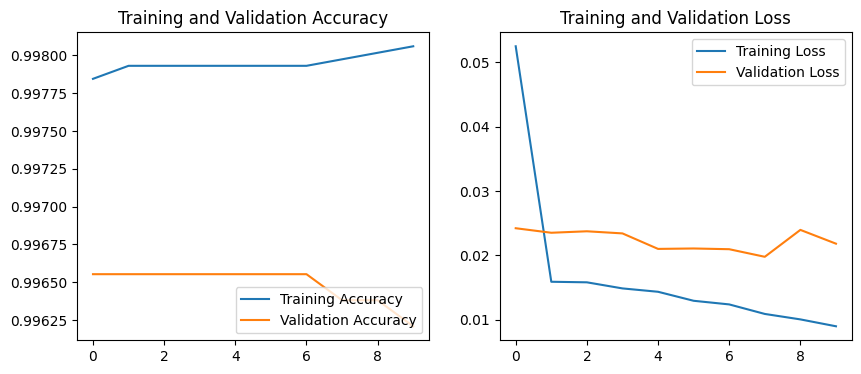

In [ ]:
#Plot
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(num_epochs)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Print the accuracy of train and valid data:
train_dense_results = model_Denes.evaluate(training_padded, np.asarray(y_train),
                                     verbose=1, batch_size=256)
valid_dense_results = model_Denes.evaluate(validing_padded, np.asarray(y_valid),
                                     verbose=1, batch_size=256)
tested_dense_results = model_Denes.evaluate(testing_padded, np.asarray(y_test),
                                            verbose=1, batch_size=256)

print(f'Train accuracy: {train_dense_results[1]*100:0.2f}')
print(f'Valid accuracy: {valid_dense_results[1]*100:0.2f}')
print(f'Tested accuracy: {tested_dense_results[1]*100:0.2f}')

23/23 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 0.9980
Train accuracy: 99.82
Valid accuracy: 99.62
Tested accuracy: 99.80


In [ ]:
preds_1 = model_Denes.predict(testing_padded)

accuracy = accuracy_score(y_test, np.round(abs(preds_1)))
precision = precision_score(y_test,np.round(abs(preds_1)))
recall = recall_score(y_test, np.round(abs(preds_1)))
f1 = f1_score(y_test,np.round(abs(preds_1)))

print(' Accuracy score: {:2.1f}%'.format(accuracy*100.))
print('Precision score: {:2.1f}%'.format(precision*100.))
print('   Recall score: {:2.1f}%'.format(recall*100.))
print('       F1 score: {:2.1f}%'.format(f1*100.))

182/182 [==============================] - 0s 2ms/step
 Accuracy score: 99.8%
Precision score: 99.8%
   Recall score: 100.0%
       F1 score: 99.9%


In [ ]:
print(classification_report(y_test, np.round(abs(preds_1))))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       1.00      1.00      1.00      5791

    accuracy                           1.00      5802
   macro avg       0.50      0.50      0.50      5802
weighted avg       1.00      1.00      1.00      5802



<Axes: >

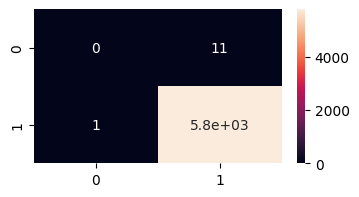

In [ ]:
df_metrics = pd.DataFrame(confusion_matrix(y_test,np.round(abs(preds_1))),index=['0','1'], columns=['0','1'])

plt.figure(figsize = (4,2))

sn.heatmap(df_metrics, annot=True)

In [ ]:
### save model
model_Denes.save("model/model_Denes")

with open('model/model_Denes.pickle', 'wb') as f:
    pickle.dump(model_Denes, f)

pickle.dump(tokenizer, open("model/tokenizer.pickle", "wb")) #//Save tokenizer
#pickle.dump(vectorizer, open("model/vectorizer.pickle", "wb")) #//Save vectorizer

# 6.2 Long Short Term Memory (LSTM)

In [ ]:
#Define the LSTM model architecture:
n_lstm = 128
drop_lstm = 0.2# Define LSTM Model
def create_model_LSTM():
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
    model.add(SpatialDropout1D(drop_lstm))
    model.add(LSTM(n_lstm, return_sequences=False))
    model.add(Dropout(drop_lstm))
    model.add(Dense(1, activation='sigmoid'))
    #Compile the model:
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam',  metrics = ['accuracy'])

    return model

model_LSTM = create_model_LSTM()
#The summary of the model:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 256, 16)           8000      
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 24)                408       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
____________________________________________________

In [ ]:
#Train the model:
num_epochs = 10

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

#start train the model 1
history1 = model_LSTM.fit(
                     training_padded, y_train,
                     validation_data=(validing_padded, y_valid),
                     epochs=num_epochs,
                     callbacks =[early_stop],
                     verbose=1
                    )

Epoch 1/10
1451/1451 [==============================] - 350s 239ms/step - loss: 0.0199 - accuracy: 0.9976 - val_loss: 0.0092 - val_accuracy: 0.9990
Epoch 2/10
1451/1451 [==============================] - 358s 247ms/step - loss: 0.0161 - accuracy: 0.9978 - val_loss: 0.0085 - val_accuracy: 0.9990
Epoch 3/10
1451/1451 [==============================] - 347s 239ms/step - loss: 0.0159 - accuracy: 0.9978 - val_loss: 0.0085 - val_accuracy: 0.9990
Epoch 4/10
 500/1451 [=========>....................] - ETA: 3:39 - loss: 0.0164 - accuracy: 0.9977

KeyboardInterrupt: 

In [ ]:
#Plot
#import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs_range = range(num_epochs)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Print the accuracy of train and valid data:
train_dense_results = model_LSTM.evaluate(training_padded, np.asarray(y_train),
                                          verbose=1, batch_size=256)
valid_dense_results = model_LSTM.evaluate(validing_padded, np.asarray(y_valid),
                                          verbose=1, batch_size=256)
tested_dense_results = model_LSTM.evaluate(testing_padded, np.asarray(y_test),
                                           verbose=1, batch_size=256)

print(f'Train accuracy: {train_dense_results[1]*100:0.2f}')
print(f'Valid accuracy: {valid_dense_results[1]*100:0.2f}')
print(f'Tested accuracy: {tested_dense_results[1]*100:0.2f}')

152/152 - 51s - loss: 0.0162 - accuracy: 0.9978 - 51s/epoch - 338ms/step
38/38 - 13s - loss: 0.0155 - accuracy: 0.9978 - 13s/epoch - 332ms/step
38/38 - 13s - loss: 0.0170 - accuracy: 0.9977 - 13s/epoch - 335ms/step
Train accuracy: 99.78
Valid accuracy: 99.78
Tested accuracy: 99.77


In [ ]:
preds_1 = model_LSTM.predict(testing_padded)

accuracy = accuracy_score(y_test, np.round(abs(preds_1)))
precision = precision_score(y_test,np.round(abs(preds_1)))
recall = recall_score(y_test, np.round(abs(preds_1)))
f1 = f1_score(y_test,np.round(abs(preds_1)))

print(' Accuracy score: {:2.1f}%'.format(accuracy*100.))
print('Precision score: {:2.1f}%'.format(precision*100.))
print('   Recall score: {:2.1f}%'.format(recall*100.))
print('       F1 score: {:2.1f}%'.format(f1*100.))

300/300 [==============================] - 1s 2ms/step
 Accuracy score: 99.8%
Precision score: 99.8%
   Recall score: 100.0%
       F1 score: 99.9%


In [ ]:
print(classification_report(y_test, np.round(abs(preds_1))))

              precision    recall  f1-score   support

           0       0.43      0.14      0.21        22
           1       1.00      1.00      1.00      9552

    accuracy                           1.00      9574
   macro avg       0.71      0.57      0.60      9574
weighted avg       1.00      1.00      1.00      9574



<Axes: >

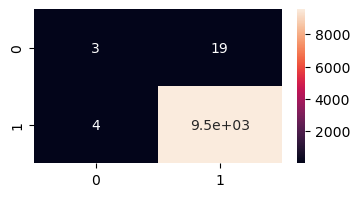

In [ ]:
df_metrics_1 = pd.DataFrame(confusion_matrix(y_test,np.round(abs(preds_1))),index=['0','1'], columns=['0','1'])

plt.figure(figsize = (4,2))

sn.heatmap(df_metrics_1, annot=True)

In [ ]:
### save model 1
model_LSTM.save("model/model_lstm")

with open('model/model_lstm.pickle', 'wb') as f:
    pickle.dump(model_LSTM, f)

#pickle.dump(tokenizer, open("model1/tokenizer1.pickle", "wb")) #//Save tokenizer
#pickle.dump(vectorizer, open("model/vectorizer.pickle", "wb")) #//Save vectorizer

INFO:tensorflow:Assets written to: model1/model_lstm1\assets


INFO:tensorflow:Assets written to: model1/model_lstm1\assets


# 6.3 Bidirectional Long Short Term Memory (Bi-LSTM)

In [ ]:
#Define the Bi-LSTM model architecture:
def create_model_Bi_LSTM():
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length = max_len))
    model.add(Bidirectional(LSTM(n_lstm, return_sequences = False)))
    model.add(Dropout(drop_lstm))
    model.add(Dense(1, activation='sigmoid'))
    #Compile the model:
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

    return model


model_Bi_LSTM = create_model_Bi_LSTM()
#The summary of the model:
model_Bi_LSTM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 256, 16)           8000      
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               148480    
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 156737 (612.25 KB)
Trainable params: 156737 (612.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Train the model:
num_epochs = 10
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

#start train the model 2
history2 = model_Bi_LSTM.fit(training_padded,y_train,
                     validation_data=(validing_padded, y_valid),
                     epochs = num_epochs,
                     callbacks = [early_stop],
                     verbose = 1)

Epoch 1/10
1215/1215 - 513s - loss: 0.0200 - accuracy: 0.9977 - val_loss: 0.0150 - val_accuracy: 0.9979 - 513s/epoch - 422ms/step
Epoch 2/10
1215/1215 - 503s - loss: 0.0160 - accuracy: 0.9978 - val_loss: 0.0160 - val_accuracy: 0.9979 - 503s/epoch - 414ms/step
Epoch 3/10
1215/1215 - 521s - loss: 0.0154 - accuracy: 0.9978 - val_loss: 0.0154 - val_accuracy: 0.9979 - 521s/epoch - 429ms/step


In [ ]:
#Plot
#import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs_range = range(num_epochs)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Print the accuracy of train and valid data:
train_dense_results = model_Bi_LSTM.evaluate(training_padded, np.asarray(y_train), verbose=1, batch_size=256)

valid_dense_results = model_Bi_LSTM.evaluate(validing_padded, np.asarray(y_valid), verbose=1, batch_size=256)

tested_dense_results = model_Bi_LSTM.evaluate(testing_padded, np.asarray(y_test), verbose=1, batch_size=256)

print(f'Train accuracy: {train_dense_results[1]*100:0.2f}')
print(f'Valid accuracy: {valid_dense_results[1]*100:0.2f}')
print(f'Tested accuracy: {tested_dense_results[1]*100:0.2f}')

152/152 - 88s - loss: 0.0151 - accuracy: 0.9978 - 88s/epoch - 581ms/step
38/38 - 24s - loss: 0.0154 - accuracy: 0.9978 - 24s/epoch - 638ms/step
38/38 - 22s - loss: 0.0163 - accuracy: 0.9977 - 22s/epoch - 578ms/step
Train accuracy: 99.78
Valid accuracy: 99.78
Tested accuracy: 99.77


In [ ]:
preds_2 = model_Bi_LSTM.predict(testing_padded)

accuracy = accuracy_score(y_test, np.round(abs(preds_2)))
precision = precision_score(y_test,np.round(abs(preds_2)))
recall = recall_score(y_test, np.round(abs(preds_2)))
f1 = f1_score(y_test,np.round(abs(preds_2)))

print(' Accuracy score: {:2.1f}%'.format(accuracy*100.))
print('Precision score: {:2.1f}%'.format(precision*100.))
print('   Recall score: {:2.1f}%'.format(recall*100.))
print('       F1 score: {:2.1f}%'.format(f1*100.))

300/300 [==============================] - 1s 2ms/step
 Accuracy score: 99.8%
Precision score: 99.8%
   Recall score: 100.0%
       F1 score: 99.9%


In [ ]:
print(classification_report(y_test, np.round(abs(preds_2))))

              precision    recall  f1-score   support

           0       0.43      0.14      0.21        22
           1       1.00      1.00      1.00      9552

    accuracy                           1.00      9574
   macro avg       0.71      0.57      0.60      9574
weighted avg       1.00      1.00      1.00      9574



<Axes: >

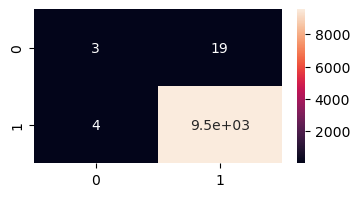

In [ ]:
df_metrics_2 = pd.DataFrame(confusion_matrix(y_test,np.round(abs(preds_2))),index=['0','1'], columns=['0','1'])

plt.figure(figsize = (4,2))

sn.heatmap(df_metrics_2, annot=True)

In [ ]:
### save model 2
model_Bi_LSTM.save("model/model_Bi_LSTM")

with open('model/model_Bi_LSTM.pickle', 'wb') as f:
    pickle.dump(model_Bi_LSTM, f)

#pickle.dump(tokenizer, open("model2/tokenizer2.pickle", "wb")) #//Save tokenizer
#pickle.dump(vectorizer, open("model/vectorizer.pickle", "wb")) #//Save vectorizer

INFO:tensorflow:Assets written to: model2/model_lstm2\assets


INFO:tensorflow:Assets written to: model2/model_lstm2\assets


# 6.4 Gated Recurrent Unit (GRU)

In [ ]:
#Define the GRU model architecture:
def create_model_GRU():
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim,  input_length = max_len))
    model.add(SpatialDropout1D(0.2))
    model.add(GRU(128, return_sequences = False))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'sigmoid'))

    #Compile the model:
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

model_GRU = create_model_GRU()
#The summary of the model:
model_GRU.summary()

In [ ]:
#Train the model:
num_epochs = 10
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# early_stop3 = tf.keras.callbacks.EarlyStopping(
#                                                     monitor="val_loss",
#                                                     min_delta=0,
#                                                     patience=0,
#                                                     verbose=0,
#                                                     mode="auto",
#                                                     baseline=None,
#                                                     restore_best_weights=False,
#                                                 )

#start train the model 3
history3 = model_GRU.fit(training_padded, y_train,
                     validation_data=(validing_padded, y_valid),
                     epochs=num_epochs,
                     callbacks =[early_stop],
                     verbose=1)

Epoch 1/10
1215/1215 - 281s - loss: 0.0239 - accuracy: 0.9971 - val_loss: 0.0151 - val_accuracy: 0.9979 - 281s/epoch - 232ms/step
Epoch 2/10
1215/1215 - 267s - loss: 0.0161 - accuracy: 0.9978 - val_loss: 0.0151 - val_accuracy: 0.9979 - 267s/epoch - 220ms/step
Epoch 3/10
1215/1215 - 282s - loss: 0.0158 - accuracy: 0.9978 - val_loss: 0.0137 - val_accuracy: 0.9979 - 282s/epoch - 232ms/step
Epoch 4/10
1215/1215 - 268s - loss: 0.0139 - accuracy: 0.9977 - val_loss: 0.0135 - val_accuracy: 0.9979 - 268s/epoch - 221ms/step
Epoch 5/10
1215/1215 - 279s - loss: 0.0120 - accuracy: 0.9978 - val_loss: 0.0135 - val_accuracy: 0.9979 - 279s/epoch - 230ms/step
Epoch 6/10
1215/1215 - 274s - loss: 0.0114 - accuracy: 0.9978 - val_loss: 0.0140 - val_accuracy: 0.9979 - 274s/epoch - 225ms/step
Epoch 7/10
1215/1215 - 264s - loss: 0.0107 - accuracy: 0.9978 - val_loss: 0.0144 - val_accuracy: 0.9979 - 264s/epoch - 218ms/step


In [ ]:
#Plot
#import matplotlib.pyplot as plt
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs_range = range(num_epochs)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Print the accuracy of train, valid and test data:
train_dense_results = model_GRU.evaluate(training_padded, np.asarray(y_train),
                                         verbose=1, batch_size=256)
valid_dense_results = model_GRU.evaluate(validing_padded, np.asarray(y_valid),
                                         verbose=1, batch_size=256)
tested_dense_results = model_GRU.evaluate(testing_padded, np.asarray(y_test),
                                          verbose=1, batch_size=256)

print(f'Train accuracy: {train_dense_results[1]*100:0.2f}')
print(f'Valid accuracy: {valid_dense_results[1]*100:0.2f}')
print(f'Tested accuracy: {tested_dense_results[1]*100:0.2f}')

152/152 - 36s - loss: 0.0100 - accuracy: 0.9978 - 36s/epoch - 237ms/step
38/38 - 9s - loss: 0.0144 - accuracy: 0.9978 - 9s/epoch - 240ms/step
38/38 - 9s - loss: 0.0151 - accuracy: 0.9977 - 9s/epoch - 234ms/step
Train accuracy: 99.78
Valid accuracy: 99.78
Tested accuracy: 99.77


In [ ]:
preds_3 = model_GRU.predict(testing_padded)

accuracy = accuracy_score(y_test, np.round(abs(preds_3)))
precision = precision_score(y_test,np.round(abs(preds_3)))
recall = recall_score(y_test, np.round(abs(preds_3)))
f1 = f1_score(y_test,np.round(abs(preds_3)))

print(' Accuracy score: {:2.1f}%'.format(accuracy*100.))
print('Precision score: {:2.1f}%'.format(precision*100.))
print('   Recall score: {:2.1f}%'.format(recall*100.))
print('       F1 score: {:2.1f}%'.format(f1*100.))

300/300 [==============================] - 20s 66ms/step
 Accuracy score: 99.8%
Precision score: 99.8%
   Recall score: 100.0%
       F1 score: 99.9%


In [ ]:
print(classification_report(y_test, np.round(abs(preds_3)) ,zero_division=True))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00        22
           1       1.00      1.00      1.00      9552

    accuracy                           1.00      9574
   macro avg       1.00      0.50      0.50      9574
weighted avg       1.00      1.00      1.00      9574



In [ ]:
### save model 3
model_GRU.save("model/model_GRU")

with open('model/model_GRU.pickle', 'wb') as f:
    pickle.dump(model_GRU, f)

#pickle.dump(tokenizer, open("model3/tokenizer3.pickle", "wb")) #//Save tokenizer
#pickle.dump(vectorizer, open("model/vectorizer.pickle", "wb")) #//Save vectorizer

INFO:tensorflow:Assets written to: model3/model_lstm3\assets


INFO:tensorflow:Assets written to: model3/model_lstm3\assets


# Comparing the four different models

In [ ]:
# Comparing the four different models
print(f"Dense model loss and accuracy: {model_Denes.evaluate(testing_padded, y_test)}")

print(f"LSTM model loss and accuracy: {model_LSTM.evaluate(testing_padded, y_test)}")

print(f"Bi-LSTM model loss and accuracy: {model_Bi_LSTM.evaluate(testing_padded, y_test)}")

print(f"GRU model loss and accuracy: {model_GRU.evaluate(testing_padded, y_test)}")

300/300 [==============================] - 1s 2ms/step - loss: 0.0122 - accuracy: 0.9976
Dense model loss and accuracy: [0.012152082286775112, 0.9975976347923279]
300/300 [==============================] - 26s 86ms/step - loss: 0.0170 - accuracy: 0.9977
LSTM model loss and accuracy: [0.017036814242601395, 0.9977021217346191]
300/300 [==============================] - 36s 121ms/step - loss: 0.0163 - accuracy: 0.9977
Bi-LSTM model loss and accuracy: [0.016337016597390175, 0.9977021217346191]
300/300 [==============================] - 22s 72ms/step - loss: 0.0151 - accuracy: 0.9977
GRU model loss and accuracy: [0.01513233408331871, 0.9977021217346191]


# Predict sentence from dataset 1

In [ ]:
import re
import pickle
import string
import pandas as pd
import numpy as np
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout, GlobalAveragePooling1D

# Read Dataset 1

In [ ]:
df1 = pd.read_csv('process_data/df1_Add_era_country.csv')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54944 entries, 0 to 54943
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   poem_id     54944 non-null  int64 
 1   poet_name   54944 non-null  object
 2   poem_title  54944 non-null  object
 3   poem_text   54944 non-null  object
 4   era         54944 non-null  object
 5   country     13409 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.5+ MB


In [ ]:
df1.head()

,poem_id,poet_name,poem_title,poem_text,era,country
0,0,خلفان بن مصبح,بدت تختال في حُلل الجمالِ,بدت تختال في حُلل الجمالِ\nوجادت بالزيارة والو...,العصر الحديث,الإمارات
1,1,خلفان بن مصبح,يا طائر الشعر القرير,يا طائر الشعر القرير\nيا وحي إلهام الصدور\nأسع...,العصر الحديث,الإمارات
2,2,خلفان بن مصبح,بنت حجرات أرى من عجب,بنت حجرات أرى من عجب\nأن أرى فيك جمال العرب\nد...,العصر الحديث,الإمارات
3,3,خلفان بن مصبح,هذا الربيع بنور الحسن وافانا,هذا الربيع بنور الحسن وافانا\nوقد كسا الأرض با...,العصر الحديث,الإمارات
4,4,خلفان بن مصبح,روحي فداك وإن مُنحتُ صدوداً,روحي فداك وإن مُنحتُ صدوداً\nأخفاك ما بي أم أط...,العصر الحديث,الإمارات


In [ ]:
stopword = set(stopwords.words('arabic'))

# turn a doc into clean tokens
def clean_doc(doc):

    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    tokens = [w for w in tokens if not w in stopword]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]

    #return tokens
    return  " ".join(tokens) +"\n"

In [ ]:
# Defining pre-processing parameters
max_len = 256
# Define parameter
vocab_size = 500
embedding_dim = 16
drop_value = 0.2
n_dense = 24# Define Dense Model Architecture

# Define a simple sequential model
def create_model_denes():
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length = max_len))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(24, activation='relu'))
    model.add(Dropout(drop_value))
    model.add(Dense(1, activation='sigmoid'))

    #Compile the model:
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

    return model

In [ ]:
# Create a basic model instance
model = create_model_denes()

# Display the model's dense architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 256, 16)           8000      
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8433 (32.94 KB)
Trainable params: 8433 (32.94 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
# Restore the weights
model.load_weights('model/model_Denes')

In [ ]:
# load the vectorizer
tokenizer = pickle.load(open('model/tokenizer.pickle', 'rb'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 256, 16)           8000      
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8433 (32.94 KB)
Trainable params: 8433 (32.94 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
# Defining pre-processing parameters
max_len = 256
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 500

def predict(text , model , tokenizer):
    new_seq = tokenizer.texts_to_sequences(text)
    padded = pad_sequences(new_seq,
                           maxlen = max_len,
                           padding = padding_type,
                           truncating = trunc_type)
    return(model.predict(padded))

In [ ]:
phrase= clean_doc(df1.poem_text[1])
phrase

'طائر الشعر القرير وحي إلهام الصدور أسعف لساني برهة بالشعر النصير فلعله تأجج سعير مجد العروبة يستثار يثور صابهم صابهم فتور مجد العروبة عرشه البنين وتقسمت أوطانهم الطغاة الجائرين والذل سيطر فيهمو واحسرتا دنيا ودين والشرق للمجير وللمعين أبناؤه أسلموا بقيادهم للظالمين بالسيف سادوا الخافقين داء التواكل فشا فينا فواعجز المراد وملوكنا أسماؤهم جماد يرجون أعدائهم يصلحوا الفساد دام حالنا فالبس الشرق الحداد بالسيف سادوا الخافقين بالشام كانت وقفة جهار الروم شتت شملهم يملكون الفرار والعرب سادوا أرضهم وتملكوا الديار بالسيف والعدل والحق بينهما منار وابن الوليد وكم أتى الله أكبر بانتصار فتحوا العواصم كلها قرار كسرى وقيصر أصبحا انكسار فهمو همو همو بالسيف سادوا الخافقين أسطول مجدهم أدراك الهمم قطع البحار للغرب يخترق الخضم اسبانيا تحزني العلم جاءك لله درك طارق حزت السباق الأمم تركوا السفين كيما قدم همو همو بالسيف سادوا الخافقين لذريق يرض الهوان ولم يجد ساعة البلاد الحق يرفع صوته الله ينصر أراد نصر الاله جنوده البلاد رفعوا الفنون بعلمهم آثارهم المعاد فهمو همو همو بالسيف سادوا الخافقين يكفهم أحرزوا بالفتح

In [ ]:
predict([phrase], model , tokenizer)

1/1 [==============================] - 0s 123ms/step


array([[0.99652183]], dtype=float32)

In [ ]:
for i in range(10):
    phrase= clean_doc(df1.poem_text[i])

    pred = predict([phrase], model , tokenizer)
    print (pred[0])

1/1 [==============================] - 0s 26ms/step
[0.9999984]
1/1 [==============================] - 0s 29ms/step
[0.99652183]
1/1 [==============================] - 0s 27ms/step
[0.9981937]
1/1 [==============================] - 0s 24ms/step
[1.]
1/1 [==============================] - 0s 24ms/step
[0.9880645]
1/1 [==============================] - 0s 24ms/step
[0.9849933]
1/1 [==============================] - 0s 23ms/step
[0.99708146]
1/1 [==============================] - 0s 24ms/step
[0.9997106]
1/1 [==============================] - 0s 28ms/step
[0.98751485]
1/1 [==============================] - 0s 26ms/step
[0.9999992]
